In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

In [2]:
df = pd.read_csv('tcd ml 2019-20 income prediction training (with labels).csv')
df.head()

,Instance,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income in EUR
0,1,1997.0,0,41.0,Belarus,1239930,steel workers,Bachelor,0,Blond,193,61031.94416
1,2,1996.0,other,41.0,Singapore,1603504,safe event coordinator,Master,0,Black,186,91001.32764
2,3,2018.0,other,28.0,Norway,1298017,receivables/payables analyst,PhD,1,Brown,170,157982.17670
3,4,2006.0,other,33.0,Cuba,751903,fleet assistant,No,1,Black,171,45993.75793
4,5,2010.0,female,46.0,United Arab Emirates,95389,lead trainer,0,0,Blond,188,38022.16217


In [31]:
df.shape

(111060, 19)

In [4]:
df.isnull().sum()

Instance                0
Year of Record        441
Gender               7432
Age                   494
Country                 0
Size of City            0
Profession            322
University Degree    7370
Wears Glasses           0
Hair Color           7242
Body Height [cm]        0
Income in EUR           0
dtype: int64

In [5]:
df = df.dropna(subset=["Year of Record", "Age"], how = "any")

In [6]:
df.shape

(111060, 12)

In [7]:
df.isnull().sum()

Instance                0
Year of Record          0
Gender               7376
Age                     0
Country                 0
Size of City            0
Profession            321
University Degree    7297
Wears Glasses           0
Hair Color           7176
Body Height [cm]        0
Income in EUR           0
dtype: int64

In [8]:
df.groupby('Gender').size()

Gender
0            719
female     26935
male       42417
other      26839
unknown     6774
dtype: int64

In [9]:
df['Gender'] = df['Gender'].replace('0', 'unknown')

In [10]:
print(df.groupby('Hair Color').size())

Hair Color
0             29
Black      42461
Blond      27004
Brown      26965
Red         6775
Unknown      650
dtype: int64


In [11]:
df['Hair Color'] = df['Hair Color'].replace('0', 'Unknown')

In [12]:
df = pd.concat((df,pd.get_dummies(df.Gender)),1)
del df['Gender']
df.head()

,Instance,Year of Record,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income in EUR,female,male,other,unknown
0,1,1997.0,41.0,Belarus,1239930,steel workers,Bachelor,0,Blond,193,61031.94416,0,0,0,1
1,2,1996.0,41.0,Singapore,1603504,safe event coordinator,Master,0,Black,186,91001.32764,0,0,1,0
2,3,2018.0,28.0,Norway,1298017,receivables/payables analyst,PhD,1,Brown,170,157982.17670,0,0,1,0
3,4,2006.0,33.0,Cuba,751903,fleet assistant,No,1,Black,171,45993.75793,0,0,1,0
4,5,2010.0,46.0,United Arab Emirates,95389,lead trainer,0,0,Blond,188,38022.16217,1,0,0,0


In [13]:
df.shape

(111060, 15)

In [14]:
df = pd.concat((df,pd.get_dummies(df['Hair Color'])),1)
del df['Hair Color']
df.head()

,Instance,Year of Record,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Body Height [cm],Income in EUR,female,male,other,unknown,Black,Blond,Brown,Red,Unknown
0,1,1997.0,41.0,Belarus,1239930,steel workers,Bachelor,0,193,61031.94416,0,0,0,1,0,1,0,0,0
1,2,1996.0,41.0,Singapore,1603504,safe event coordinator,Master,0,186,91001.32764,0,0,1,0,1,0,0,0,0
2,3,2018.0,28.0,Norway,1298017,receivables/payables analyst,PhD,1,170,157982.17670,0,0,1,0,0,0,1,0,0
3,4,2006.0,33.0,Cuba,751903,fleet assistant,No,1,171,45993.75793,0,0,1,0,1,0,0,0,0
4,5,2010.0,46.0,United Arab Emirates,95389,lead trainer,0,0,188,38022.16217,1,0,0,0,0,1,0,0,0


In [15]:
df.shape

(111060, 19)

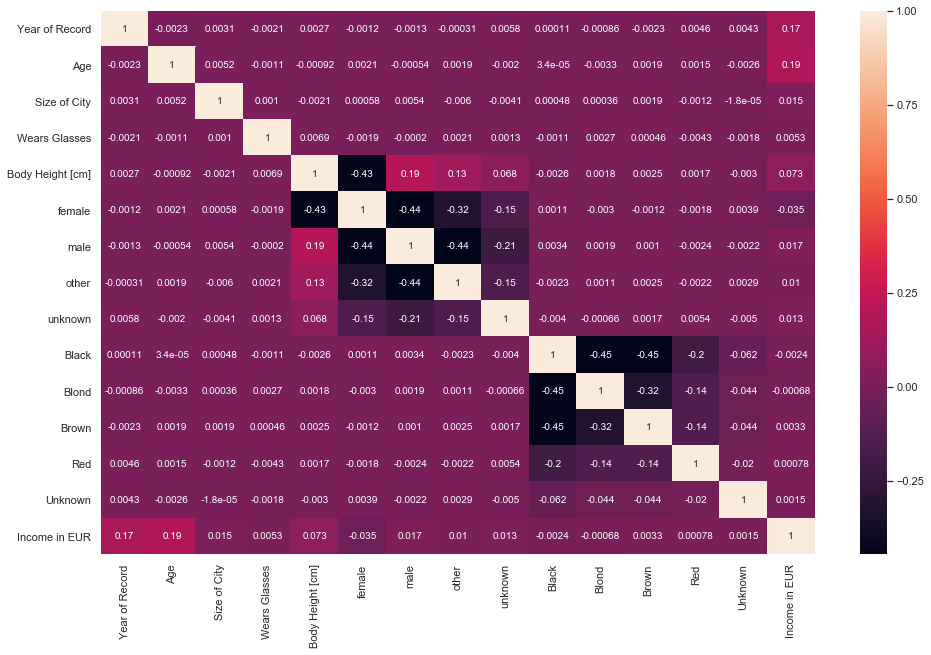

In [16]:
plt.figure(figsize=(16,10))
sns.heatmap(df[["Year of Record", "Age", "Size of City", "Wears Glasses", "Body Height [cm]", "female", "male", "other", "unknown", "Black", "Blond", "Brown", "Red", "Unknown","Income in EUR"]].corr(), annot=True)
plt.show()

In [17]:
import sklearn
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

X = df[["Year of Record", "Age", "Size of City", "Wears Glasses", "Body Height [cm]"]].values 
y = df["Income in EUR"].values
sc = StandardScaler()
X = sc.fit_transform(X)

In [18]:
test_size = 30000

X_train = X[:-test_size]
y_train = y[:-test_size]

X_test = X[-test_size:]
y_test = y[-test_size:]

In [19]:
clf = SGDRegressor(max_iter=5)
clf.fit(X_train, y_train)

print(clf.score(X_test, y_test))

0.06530688377779104


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [20]:
for X,y in list(zip(X_test, y_test))[:200]:
    print(clf.predict([X])[0], y)

87873.52625229966 223948.2513
80314.7942963417 1290.6696259999999
101842.98412553075 75993.28049
75852.5439356267 455386.3192
127784.56355253427 226207.4022
111027.47479486822 37446.76927
219607.48173194833 66772.60102
98104.6827262443 205404.1084
55766.37883712374 96010.64577999999
94230.52951866205 38217.62582
141506.41922383718 65941.63874
156629.81182654976 179256.617
47962.1594415234 30038.577980000002
113570.74853481488 30084.99652
118747.90342400195 245832.0243
69568.6537125479 51171.33081
81223.47300949568 9269.003116
66990.04344478578 96633.29913
108306.16533418975 61481.592860000004
105979.09208765703 26845.63101
85268.6369736121 70569.9843
67549.5152707712 22056.97144
112397.34518705095 62679.30051
53310.54262526877 45396.765980000004
165828.36774723604 215022.3873
87885.71683547359 41334.98448
80818.90366877856 81896.03965
138349.04285242743 127387.2427
157050.65123738538 173282.8825
100019.77631429248 31783.098169999997
102350.14729043902 29676.00861
134488.37407364647 181

# Test Data Input

In [21]:
test_df = pd.read_csv('Data/tcd ml 2019-20 income prediction test (without labels).csv')
test_df.head()

,Instance,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income
0,111994,1992.0,other,21.0,Honduras,391652,senior project analyst,Master,1,Brown,153,NaN
1,111995,1986.0,other,34.0,Kyrgyzstan,33653,greeter,Bachelor,0,Black,163,NaN
2,111996,1994.0,unknown,53.0,Portugal,34765,liaison,Bachelor,1,Blond,153,NaN
3,111997,1984.0,0,29.0,Uruguay,1494132,occupational therapist,No,0,Black,154,NaN
4,111998,2007.0,other,17.0,Serbia,120661,portfolio manager,No,0,Red,191,NaN


In [30]:
test_df.shape

(73230, 19)

In [23]:
test_df.shape
test_df.isnull().sum()

Instance                 0
Year of Record         295
Gender                4862
Age                    279
Country                  0
Size of City             0
Profession             195
University Degree     4857
Wears Glasses            0
Hair Color            4916
Body Height [cm]         0
Income               73230
dtype: int64

In [24]:
test_df['Gender'] = test_df['Gender'].replace('0', 'unknown')
test_df = pd.concat((test_df,pd.get_dummies(test_df.Gender)),1)
del test_df['Gender']
test_df.head()

,Instance,Year of Record,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income,female,male,other,unknown
0,111994,1992.0,21.0,Honduras,391652,senior project analyst,Master,1,Brown,153,NaN,0,0,1,0
1,111995,1986.0,34.0,Kyrgyzstan,33653,greeter,Bachelor,0,Black,163,NaN,0,0,1,0
2,111996,1994.0,53.0,Portugal,34765,liaison,Bachelor,1,Blond,153,NaN,0,0,0,1
3,111997,1984.0,29.0,Uruguay,1494132,occupational therapist,No,0,Black,154,NaN,0,0,0,1
4,111998,2007.0,17.0,Serbia,120661,portfolio manager,No,0,Red,191,NaN,0,0,1,0


In [25]:
test_df['Hair Color'] = test_df['Hair Color'].replace('0', 'Unknown')
test_df = pd.concat((test_df,pd.get_dummies(test_df['Hair Color'])),1)
del test_df['Hair Color']
test_df.head()

,Instance,Year of Record,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Body Height [cm],Income,female,male,other,unknown,Black,Blond,Brown,Red,Unknown
0,111994,1992.0,21.0,Honduras,391652,senior project analyst,Master,1,153,NaN,0,0,1,0,0,0,1,0,0
1,111995,1986.0,34.0,Kyrgyzstan,33653,greeter,Bachelor,0,163,NaN,0,0,1,0,1,0,0,0,0
2,111996,1994.0,53.0,Portugal,34765,liaison,Bachelor,1,153,NaN,0,0,0,1,0,1,0,0,0
3,111997,1984.0,29.0,Uruguay,1494132,occupational therapist,No,0,154,NaN,0,0,0,1,1,0,0,0,0
4,111998,2007.0,17.0,Serbia,120661,portfolio manager,No,0,191,NaN,0,0,1,0,0,0,0,1,0


In [26]:
test_df.isnull().sum()

Instance                 0
Year of Record         295
Age                    279
Country                  0
Size of City             0
Profession             195
University Degree     4857
Wears Glasses            0
Body Height [cm]         0
Income               73230
female                   0
male                     0
other                    0
unknown                  0
Black                    0
Blond                    0
Brown                    0
Red                      0
Unknown                  0
dtype: int64

In [27]:
test_df.sort_values(by='Year of Record', ascending=False).tail()

,Instance,Year of Record,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Body Height [cm],Income,female,male,other,unknown,Black,Blond,Brown,Red,Unknown
72420,184414,NaN,68.0,Belgium,637286,procurement contracting officer,No,0,139,NaN,1,0,0,0,1,0,0,0,0
72887,184881,NaN,29.0,New Zealand,22509,performance management specialist,NaN,1,153,NaN,0,0,1,0,0,1,0,0,0
72928,184922,NaN,29.0,Bolivia,29020,plumber's helper,Bachelor,0,171,NaN,0,1,0,0,1,0,0,0,0
73087,185081,NaN,40.0,Norway,1937485,flight engineer,Bachelor,0,163,NaN,1,0,0,0,0,1,0,0,0
73120,185114,NaN,26.0,Austria,54249,surgeon,NaN,0,162,NaN,1,0,0,0,1,0,0,0,0


In [28]:
test_df['Age'] = test_df['Age'].interpolate()
test_df['Year of Record'] = test_df['Year of Record'].interpolate()

In [29]:
test_df.isnull().sum()

Instance                 0
Year of Record           0
Age                      0
Country                  0
Size of City             0
Profession             195
University Degree     4857
Wears Glasses            0
Body Height [cm]         0
Income               73230
female                   0
male                     0
other                    0
unknown                  0
Black                    0
Blond                    0
Brown                    0
Red                      0
Unknown                  0
dtype: int64

In [30]:
test_X = test_df[["Year of Record", "Age", "Size of City", "Wears Glasses", "Body Height [cm]"]].values 
test_sc = StandardScaler()
test_X = sc.fit_transform(test_X)

prediction_value = clf.predict(test_X)

In [32]:
test_df['Income'] = prediction_value
file = test_df[['Instance', 'Income']]
file

,Instance,Income
0,111994,55836.408443
1,111995,64876.824949
2,111996,109759.322626
3,111997,49145.896539
4,111998,93723.720124
5,111999,159220.690313
6,112000,130366.734518
7,112001,163233.803135
8,112002,136381.445151
9,112003,107389.906420


In [33]:
export_csv = file.to_csv('FinalOutput.csv', index = None, header = True)